# Import Libraries

In [1]:
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
import copy

In [2]:
numb_batch=64

# Getting Data 

In [3]:
T=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

train_data=torchvision.datasets.MNIST('mnist_data',train=True,download=True,transform=T);
val_data=torchvision.datasets.MNIST('mnist_data',train=False,download=True,transform=T);

train_dl=torch.utils.data.DataLoader(train_data,batch_size=numb_batch)
val_dl=torch.utils.data.DataLoader(val_data,batch_size=numb_batch)

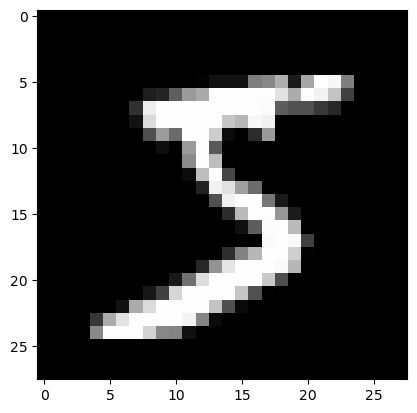

In [4]:
plt.imshow(train_data[0][0][0],cmap="gray")

# Create the Model

In [5]:
def create_lenet():
    model=nn.Sequential(
        nn.Conv2d(1,6,5,padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2),
        
        nn.Conv2d(6,16,5,padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2),
        
        nn.Flatten(),
        nn.Linear(400,120),
        nn.Linear(120,84),
        nn.Linear(84,10)
    )
    return model

# Validate the Model

In [6]:
def validate(model,data):
    total=0
    correct=0
    for i,(images,labels) in enumerate(data):
        images=images
        x=model(images)
        value,pred=torch.max(x,1)
        pred=pred.data.cpu()
        total+=x.size(0)
        correct+=torch.sum(pred==labels)
    return correct*100./total

# Training Function

In [7]:
def train(numb_epoch=3, lr=1e-3, device="cpu"):
    accuracies = []
    cnn = create_lenet().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=lr)
    max_accuracy = 0
    for epoch in range(numb_epoch):
        for i, (images, labels) in enumerate(train_dl):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn, val_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            print("Saving Best Model with Accuracy: ", accuracy)
        print('Epoch:', epoch+1, "Accuracy :", accuracy, '%')
    plt.plot(accuracies)
    device=torch.device("cpu")
    return best_model

# Training the model

Saving Best Model with Accuracy:  93.94000244140625
Epoch: 1 Accuracy : 93.94000244140625 %
Saving Best Model with Accuracy:  97.47000122070312
Epoch: 2 Accuracy : 97.47000122070312 %
Saving Best Model with Accuracy:  98.12999725341797
Epoch: 3 Accuracy : 98.12999725341797 %
Saving Best Model with Accuracy:  98.5199966430664
Epoch: 4 Accuracy : 98.5199966430664 %
Saving Best Model with Accuracy:  98.69999694824219
Epoch: 5 Accuracy : 98.69999694824219 %
Saving Best Model with Accuracy:  98.70999908447266
Epoch: 6 Accuracy : 98.70999908447266 %
Saving Best Model with Accuracy:  98.7300033569336
Epoch: 7 Accuracy : 98.7300033569336 %
Saving Best Model with Accuracy:  98.80000305175781
Epoch: 8 Accuracy : 98.80000305175781 %
Epoch: 9 Accuracy : 98.77999877929688 %
Epoch: 10 Accuracy : 98.5199966430664 %
Epoch: 11 Accuracy : 98.47000122070312 %
Epoch: 12 Accuracy : 98.69999694824219 %
Epoch: 13 Accuracy : 98.62000274658203 %
Epoch: 14 Accuracy : 98.56999969482422 %
Epoch: 15 Accuracy : 98.

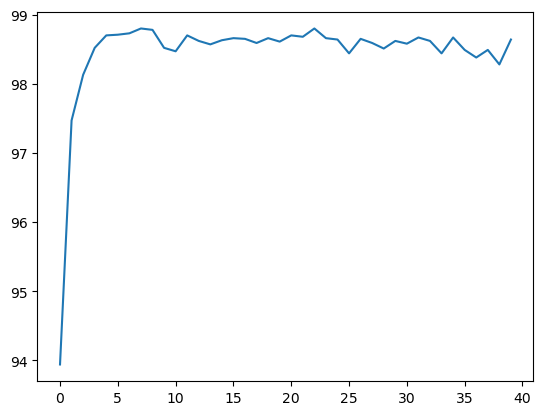

In [10]:
lemet=train(40,device=device)